# Plotting data in Python with matplotlib

This example uses the dataset from [Smith et al. (2003)](http://www.esapubs.org/archive/ecol/E084/094/metadata.htm) with data on body mass for over 5,000 species of mammals. Along with the mass is information on whether the species is extinct or extant (living), distribution and taxonomy.

We will use this dataset to explore ploting in Python using matplotlib. 


## Pandas
[Pandas](http://pandas.pydata.org/) is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

It is common practice to `import pandas as pd`, and then reference its functions as pd.function.

We will use the [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame) class to import a table of data. 



## The code blocks


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path

#Set matplotlib to display graphs in jupyter
%matplotlib inline

# Get some data from the Mammals.csv file
# This file was downloaded from http://www.esapubs.org/archive/ecol/E084/094/metadata.htm
data = pd.read_csv('data/Mammals.csv')

In [3]:
# data is a pandas datafram
# Let's have a look at a few rows of the file.
data.head()

,Continent,Status,Order,Family,Genus,Species,Log_mass,Combined_mass,Reference
0,AF,extant,Artiodactyla,Bovidae,Addax,nasomaculatus,4.85,70000.3,60
1,AF,extant,Artiodactyla,Bovidae,Aepyceros,melampus,4.72,52500.1,"63, 70"
2,AF,extant,Artiodactyla,Bovidae,Alcelaphus,buselaphus,5.23,171001.5,"63, 70"
3,AF,extant,Artiodactyla,Bovidae,Ammodorcas,clarkei,4.45,28049.8,60
4,AF,extant,Artiodactyla,Bovidae,Ammotragus,lervia,4.68,48000.0,75


In [4]:
# Get some stats on the data
data.describe()

,Log_mass,Combined_mass
count,5731.000000,5.731000e+03
mean,-237.270858,1.531570e+05
std,427.389632,3.149260e+06
min,-999.000000,-9.990000e+02
25%,0.600000,4.000000e+00
50%,1.600000,4.000000e+01
75%,2.890000,7.757000e+02
max,8.280000,1.900000e+08


In [5]:
# groupby is a great function to help explore data.
data.groupby('Continent').describe()

Combined_mass     Log_mass
Continent                                  
AF        count   1.033000e+03  1033.000000
          mean    3.462160e+04  -285.443698
          std     2.785594e+05   453.502228
          min    -9.990000e+02  -999.000000
          25%    -9.990000e+02  -999.000000
          50%     2.970000e+01     1.470000
          75%     7.500000e+02     2.880000
          max     6.500000e+06     6.810000
AUS       count   3.460000e+02   346.000000
          mean    4.626705e+04   -23.284451
          std     1.662109e+05   159.689709
          min    -9.990000e+02  -999.000000
          25%     2.500000e+01     1.400000
          50%     2.280000e+02     2.355000
          75%     8.375000e+03     3.922500
          max     1.600000e+06     6.200000
Af        count   1.000000e+00     1.000000
          mean   -9.990000e+02  -999.000000
          std              NaN          NaN
          min    -9.990000e+02  -999.000000
          25%    -9.990000e+02  -999.000000
          50%    -9.990000e+02  -999.000000
          75%    -9.990000e+02  -999.000000
          max    -9.990000e+02  -999.000000
EA        count   1.033000e+03  1033.000000
          mean    2.219665e+04  -405.632953
          std     1.398456e+05   492.379843
          min    -9.990000e+02  -999.000000
          25%    -9.990000e+02  -999.000000
          50%     8.800000e+00     0.940000
          75%     4.400000e+02     2.640000
          max     2.720000e+06     6.430000
Insular   count   1.484000e+03  1484.000000
          mean    1.178632e+04  -355.357891
          std     1.595879e+05   479.905144
          min    -9.990000e+02  -999.000000
          25%    -9.990000e+02  -999.000000
          50%     1.495000e+01     1.175000
          75%     2.515500e+02     2.400000
          max     4.000000e+06     6.600000
Oceanic   count   7.800000e+01    78.000000
          mean    8.238885e+06   -32.793077
          std     2.573198e+07   194.494619
          min    -9.990000e+02  -999.000000
          25%     1.043750e+05     5.017500
          50%     2.430000e+05     5.380000
          75%     3.400000e+06     6.530000
          max     1.900000e+08     8.280000
SA        count   9.770000e+02   977.000000
          mean    8.025056e+04   -45.724289
          std     5.155597e+05   214.415467
          min    -9.990000e+02  -999.000000
          25%     2.700000e+01     1.430000
          50%     8.900000e+01     1.950000
          75%     9.000000e+02     2.950000
          max     7.580000e+06     6.880000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107205940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f39b8d0>]], dtype=object)

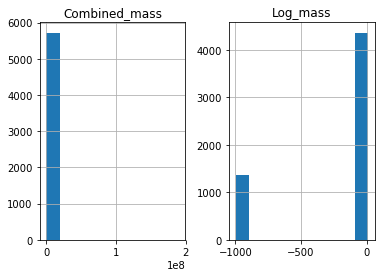

In [6]:
# hist() will make a histogram of the data
data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1102aeba8>]], dtype=object)

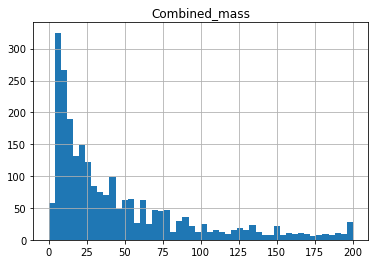

In [7]:
# We can modify how hist() works, adding the column we want, specifying how many bins
#   to divide the data into, the range to use on the x-axis and other features.
data.hist(column='Combined_mass', bins=50,range=[0,200])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1104c39e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11074cf60>]], dtype=object)

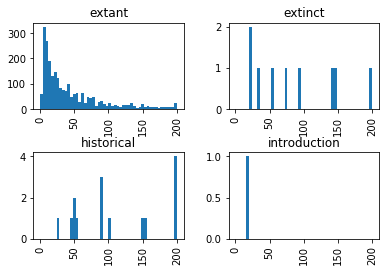

In [8]:
# We can use "by" to group by a column.
data.hist(column='Combined_mass', by='Status', bins=50,range=[0,200])

In [9]:
# Let's focus on the extant species by making a new dataframe with only the exant records.
# .loc() is a label-based selector.
Extant=data.loc[data['Status']=='extant']
Extant.head()

,Continent,Status,Order,Family,Genus,Species,Log_mass,Combined_mass,Reference
0,AF,extant,Artiodactyla,Bovidae,Addax,nasomaculatus,4.85,70000.3,60
1,AF,extant,Artiodactyla,Bovidae,Aepyceros,melampus,4.72,52500.1,"63, 70"
2,AF,extant,Artiodactyla,Bovidae,Alcelaphus,buselaphus,5.23,171001.5,"63, 70"
3,AF,extant,Artiodactyla,Bovidae,Ammodorcas,clarkei,4.45,28049.8,60
4,AF,extant,Artiodactyla,Bovidae,Ammotragus,lervia,4.68,48000.0,75


In [10]:
Extant.describe()

,Log_mass,Combined_mass
count,5388.000000,5.388000e+03
mean,-244.296525,1.322729e+05
std,431.456616,3.231775e+06
min,-999.000000,-9.990000e+02
25%,0.487500,3.075000e+00
50%,1.540000,3.455000e+01
75%,2.640000,4.327000e+02
max,8.280000,1.900000e+08


array([<matplotlib.axes._subplots.AxesSubplot object at 0x110899f28>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x110d662b0>], dtype=object)

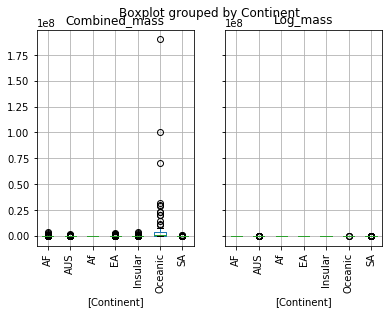

In [11]:
Extant.boxplot(by='Continent', rot=90)

## And another way...


Continent
AF     Axes(0.125,0.125;0.775x0.755)
AUS    Axes(0.125,0.125;0.775x0.755)
Name: Combined_mass, dtype: object

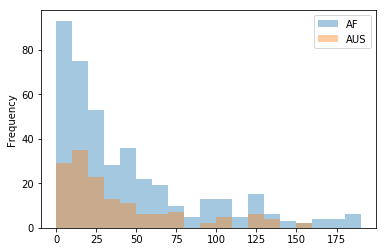

In [12]:
bin_values=np.arange(start=0,stop=200,step=10)
Cont_mass_index=Extant['Continent'].isin(['AF','AUS'])
Cont_mass=Extant[Cont_mass_index]
Group_mass=Cont_mass.groupby('Continent')['Combined_mass']
Group_mass.plot(kind='hist',bins=bin_values, alpha=0.4,legend=True)

In [13]:
Orders=Extant['Order'].unique().tolist()
Orders

['Artiodactyla',
 'Carnivora',
 'Chiroptera',
 'Hyracoidea',
 'Insectivora',
 'Lagomorpha',
 'Macroscelidea',
 'Perissodactyla',
 'Pholidota',
 'Primates',
 'Proboscidea',
 'Rodentia',
 'Sirenia',
 'Tubulidentata',
 'Dasyuromorphia',
 'Diprotodontia',
 'Monotremata',
 'Notoryctemorphia',
 'Peramelemorphia',
 'Dermoptera',
 'Scandentia',
 'Didelphimorphia',
 'Xenarthra',
 'Cetacea',
 'Microbiotheria',
 'Paucituberculata']

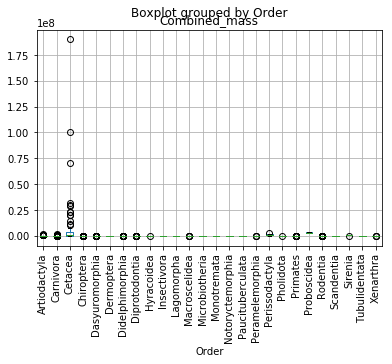

In [14]:
Extant.boxplot(column='Combined_mass', by='Order', rot=90)

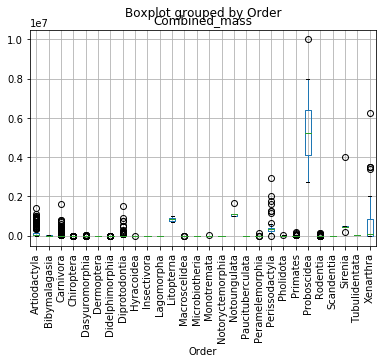

In [15]:
NoWhales=data.loc[data['Order']!='Cetacea']
NoWhales.boxplot(column='Combined_mass', by='Order', rot=90)